In [3]:
import numpy as np
import lensmodel as lm

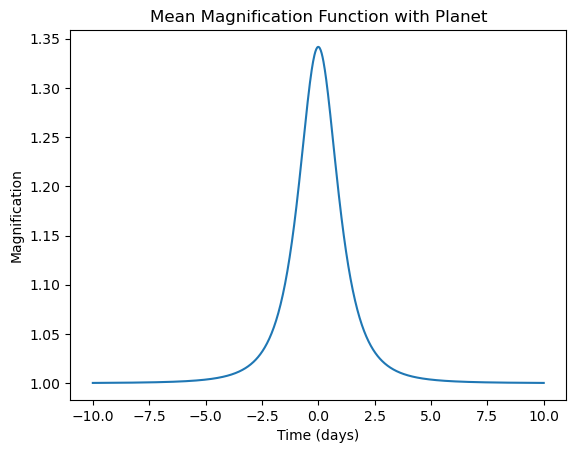

In [4]:
# random initial parameters for mean_function_with_planet
M = 1
d_L = 1
d_S = 2
v_T = 100
M_p = 1
r_P = 1

# random time array
t = np.linspace(-10, 10, 1000)

# plot
import matplotlib.pyplot as plt

plt.plot(t, lm.mean_function_with_planet(t, M, d_L, d_S, v_T, M_p, r_P))
plt.xlabel("Time (days)")
plt.ylabel("Magnification")
plt.title("Mean Magnification Function with Planet")
plt.show()

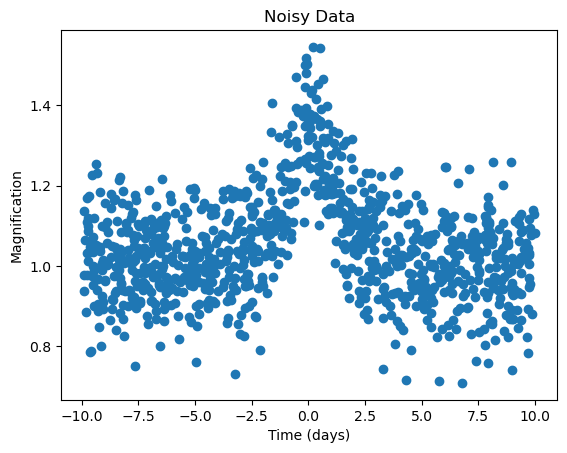

In [5]:
# generate a noisy dataset using noisy_data_calc

# Set random seed for reproducibility
np.random.seed(42)

# Initialize parameters
low = -10
upper = 10
theta = [1, 2, 100, 1]  # Parameters of the lightcurve model: d_L, D_S, v_M_ratio, u_min
noise = 0.1
number = 1000
t_0 = 0

# Generate a noisy dataset using noisy_data_calc
ts, mags = lm.noisy_data_calc(low, upper, theta, noise, number, t_0)

# Plot the noisy data
plt.plot(ts, mags, "o")
plt.xlabel("Time (days)")
plt.ylabel("Magnification")
plt.title("Noisy Data")
plt.show()


**Now proceed to test gaussian process fit to the data with different kernels**

In [15]:
import GPy



In [22]:
x = ts
y = mags
m_full = GPy.models.GPRegression(x[:, None], y[:, None])
_ = m_full.optimize(messages=True, max_f_eval=1000)


In [23]:
xt = np.linspace(0, 100, 400)[:, np.newaxis]
yt_mean, yt_var = m_full.predict(xt)
yt_sd = np.sqrt(yt_var)

In [24]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

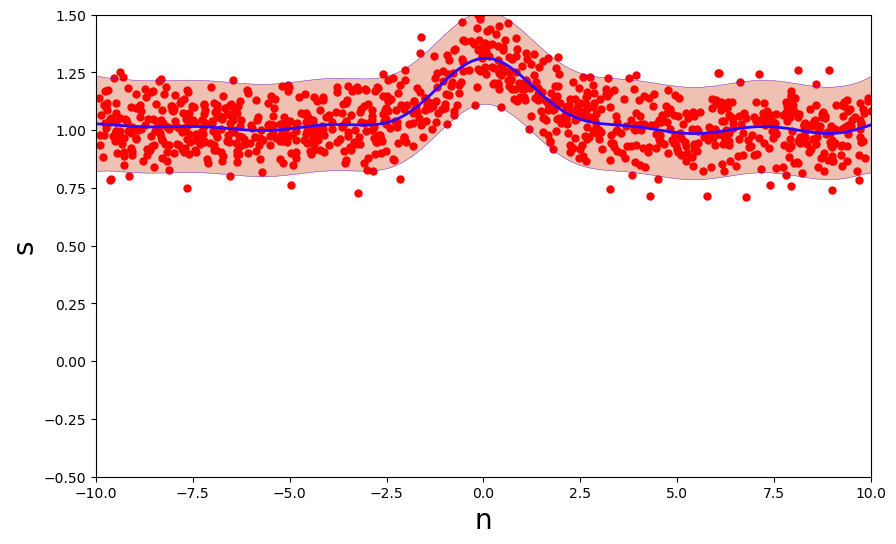

In [27]:
xlim = (-10, 10)
ylim = (-0.5, 1.5)

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, ax=ax, xlabel="n", ylabel="s", fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(
    figure=fig,
    filename="rbf_fit.svg",
    directory="./gp",
    transparent=True,
)

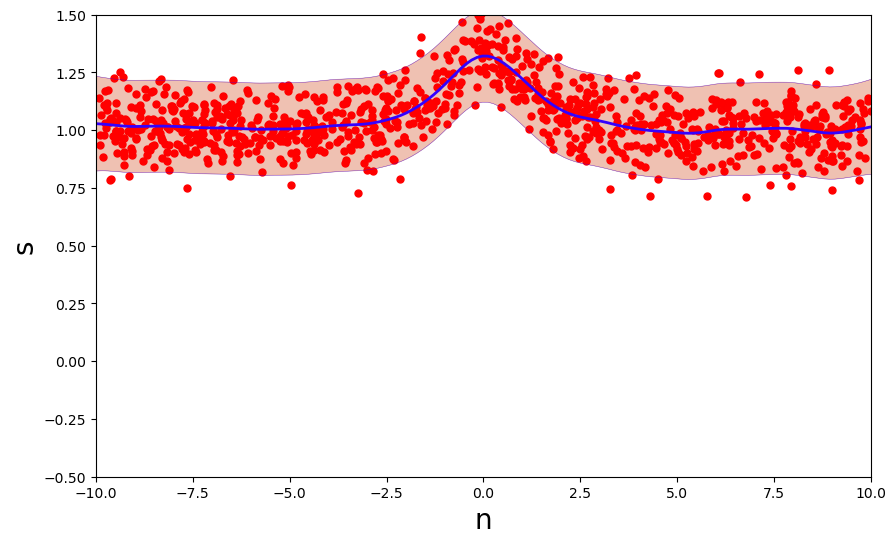

In [28]:
# try a different kernel
k = GPy.kern.Matern32(1)
m_full = GPy.models.GPRegression(x[:, None], y[:, None], kernel=k)
_ = m_full.optimize(messages=True, max_f_eval=1000)

yt_mean, yt_var = m_full.predict(xt)
yt_sd = np.sqrt(yt_var)

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, ax=ax, xlabel="n", ylabel="s", fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(
    figure=fig,
    filename="matern_fit.svg",
    directory="./gp",
    transparent=True,
)

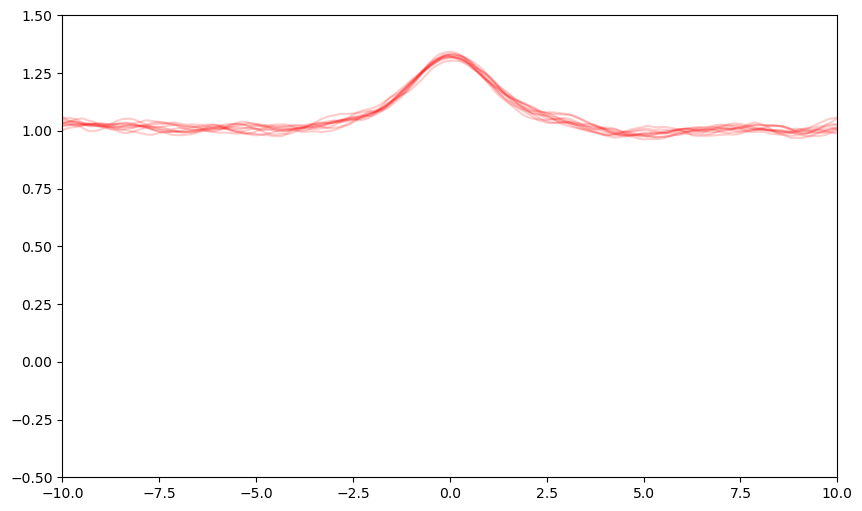

In [33]:
# sample from the posterior
xt = np.linspace(-10, 10, 1000)[:, None]
yt_samples = m_full.posterior_samples_f(xt, full_cov=True, size=10)

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)

for i in range(yt_samples.shape[1]):
    ax.plot(xt, yt_samples[:, i], "r", alpha=0.2)

# ax.plot(x, y, "kx", mew=1.5)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(
    figure=fig,
    filename="matern_samples.svg",
    directory="./gp",
    transparent=True,
)
